In [1]:
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('cars.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [5]:
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [6]:
#missing values present in normalized losses
df['normalized-losses'].value_counts()#counts the values present in the normalized losses

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [7]:
#replacing nullvalues with Nan
df['normalized-losses'].replace("?",np.nan,inplace= True)

In [8]:
df['normalized-losses'].isnull().sum()#checking total number of null values present in normalized-loss

41

In [9]:
df['normalized-losses']= df['normalized-losses'].astype(float)
# we will convert object data of normalized losses to float data so that we can handle the missing values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 24.1+ KB


In [11]:
#calculating mean for normalized losses
x=df['normalized-losses'].mean()

In [12]:
#filling the nullvalues of normalized losses with the mean
df['normalized-losses'].replace(np.nan,x,inplace= True)

In [13]:
df.describe()

,symboling,normalized-losses,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,31.681008,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,65.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,137.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [14]:
df['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64

In [15]:
df['horsepower'].replace('?', np.nan, inplace=True)

In [16]:
df['horsepower']= df['horsepower'].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         203 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


In [18]:
y=df['horsepower'].mean()

In [19]:
df.describe()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,65.907805,53.724878,126.907317,104.256158,25.219512,30.751220,13227.478049
std,1.245307,31.681008,2.145204,2.443522,41.642693,39.714369,6.542142,6.886443,7902.651615
min,-2.000000,65.000000,60.300000,47.800000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,64.100000,52.000000,97.000000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,65.500000,54.100000,120.000000,95.000000,24.000000,30.000000,10345.000000
75%,2.000000,137.000000,66.900000,55.500000,141.000000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,72.300000,59.800000,326.000000,288.000000,49.000000,54.000000,45400.000000


In [20]:
y=df['horsepower'].mean()

In [21]:
y

104.25615763546799

In [22]:
df['horsepower'].replace(np.nan, y,inplace= True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


In [24]:
df['horsepower'].value_counts()

68.000000     19
70.000000     11
69.000000     10
116.000000     9
110.000000     8
95.000000      7
88.000000      6
62.000000      6
101.000000     6
160.000000     6
114.000000     6
84.000000      5
97.000000      5
102.000000     5
145.000000     5
82.000000      5
76.000000      5
111.000000     4
92.000000      4
123.000000     4
86.000000      4
90.000000      3
73.000000      3
85.000000      3
207.000000     3
182.000000     3
121.000000     3
152.000000     3
112.000000     2
56.000000      2
161.000000     2
156.000000     2
94.000000      2
52.000000      2
104.256158     2
162.000000     2
155.000000     2
184.000000     2
100.000000     2
176.000000     2
55.000000      1
262.000000     1
134.000000     1
115.000000     1
140.000000     1
48.000000      1
58.000000      1
60.000000      1
78.000000      1
135.000000     1
200.000000     1
64.000000      1
120.000000     1
72.000000      1
154.000000     1
288.000000     1
143.000000     1
142.000000     1
175.000000    

In [25]:
df.describe()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,65.907805,53.724878,126.907317,104.256158,25.219512,30.751220,13227.478049
std,1.245307,31.681008,2.145204,2.443522,41.642693,39.519211,6.542142,6.886443,7902.651615
min,-2.000000,65.000000,60.300000,47.800000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,64.100000,52.000000,97.000000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,65.500000,54.100000,120.000000,95.000000,24.000000,30.000000,10345.000000
75%,2.000000,137.000000,66.900000,55.500000,141.000000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,72.300000,59.800000,326.000000,288.000000,49.000000,54.000000,45400.000000


In [26]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [27]:
# handling outliers

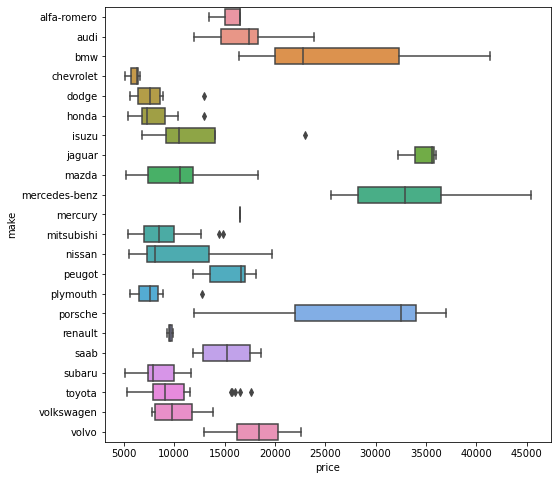

In [28]:
#plotting boxplot to check outliers by taking price at x axis and make at y axis
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='price', y= 'make')
plt.show()

In [29]:
df.loc[(df['make']=='toyota') & (df['price']>13000)]
df.drop(index=[172,178,179,180,181], inplace=True)# we will drop the outliers for toyota and similarly for others

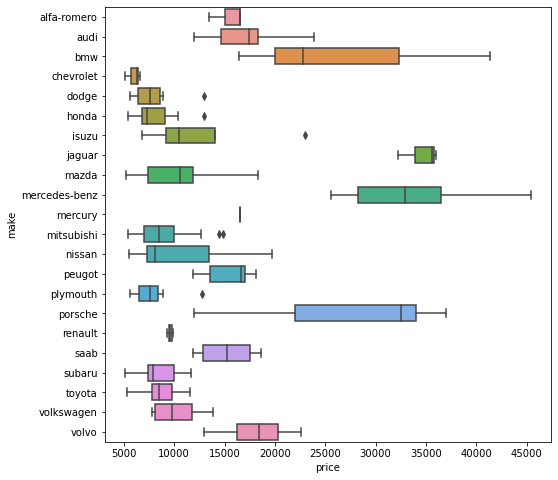

In [30]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='price', y= 'make')
plt.show()

In [31]:
df.loc[(df['make']=='plymouth') & (df['price']>12000)]#dropped plymouth outliers
df.drop(index=[124], inplace=True)

In [32]:
df.loc[(df['make']=='mitsubishi') & (df['price']>14000)]#dropped mitsubishi outliers
df.drop(index=[83,84], inplace=True)

In [33]:
df.loc[(df['make']=='isuzu') & (df['price']>22000)]#dropped isuzu outliers
df.drop(index=[45], inplace=True)                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [34]:
df.loc[(df['make']=='honda') & (df['price']>11000)]#dropped honda outliers
df.drop(index=[41], inplace=True)

In [35]:
df.loc[(df['make']=='dodge') & (df['price']>11000)]#dropped dodge outliers
df.drop(index=[29], inplace=True)

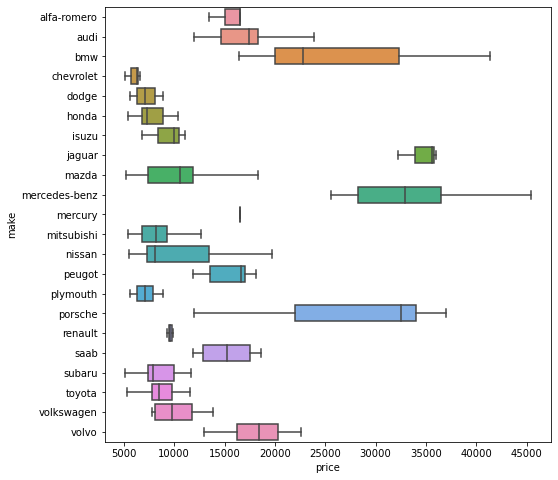

In [36]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='price', y= 'make')
plt.show()

so now we can see, our data is free from outliers

In [37]:
#Handling categorical values

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          194 non-null    int64  
 1   normalized-losses  194 non-null    float64
 2   make               194 non-null    object 
 3   fuel-type          194 non-null    object 
 4   body-style         194 non-null    object 
 5   drive-wheels       194 non-null    object 
 6   engine-location    194 non-null    object 
 7   width              194 non-null    float64
 8   height             194 non-null    float64
 9   engine-type        194 non-null    object 
 10  engine-size        194 non-null    int64  
 11  horsepower         194 non-null    float64
 12  city-mpg           194 non-null    int64  
 13  highway-mpg        194 non-null    int64  
 14  price              194 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.2+ KB


In [39]:
#splitting numeric data and categorical data
df_num= df.select_dtypes(['float64','int64']) #will get all columns which is in the brakets

In [40]:
df_cat= df.select_dtypes('object')

In [41]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [42]:
# so now we will perform label encoding on categorical data so that we can convert all the categorical data into numeric data so that we can train our model

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(df_cat['make'])

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
       15, 15, 15, 15, 15, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21])

In [44]:
#creating a for loop

for i in df_cat:
    le=LabelEncoder()
    df_cat[i]=le.fit_transform(df_cat[i])

In [45]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


categorical data is now changed to numeric data

In [46]:
#concatenate of df_num and df_cat so that we can regain our original data
df2=pd.concat([df_num,df_cat],axis=1)

In [47]:
df2

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,122.0,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,122.0,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,122.0,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,164.0,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,164.0,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845,21,1,3,2,0,3
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045,21,1,3,2,0,3
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485,21,1,3,2,0,5
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470,21,0,3,2,0,3


In [48]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()                                    
ss.fit_transform(df[['normalized-losses']])

array([[ 0.01908806],
       [ 0.01908806],
       [ 0.01908806],
       [ 1.35985945],
       [ 1.35985945],
       [ 0.01908806],
       [ 1.16832068],
       [ 0.01908806],
       [ 1.16832068],
       [ 0.01908806],
       [ 2.25370704],
       [ 2.25370704],
       [ 2.12601453],
       [ 2.12601453],
       [ 0.01908806],
       [ 0.01908806],
       [ 0.01908806],
       [ 0.01908806],
       [-0.01283507],
       [-0.74706702],
       [-1.2897602 ],
       [-0.10860446],
       [-0.10860446],
       [-0.10860446],
       [ 0.84908939],
       [ 0.84908939],
       [ 0.84908939],
       [ 0.84908939],
       [-0.36398948],
       [ 0.49793498],
       [ 0.49793498],
       [-0.65129764],
       [-0.65129764],
       [-0.65129764],
       [-0.36398948],
       [-1.38552959],
       [-0.491682  ],
       [-0.491682  ],
       [-1.16206769],
       [-1.16206769],
       [-0.45975887],
       [ 0.01908806],
       [ 0.01908806],
       [ 0.01908806],
       [ 0.75332001],
       [ 0

In [49]:
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()
mms.fit_transform(df[['normalized-losses']])

array([[0.29842932],
       [0.29842932],
       [0.29842932],
       [0.51832461],
       [0.51832461],
       [0.29842932],
       [0.48691099],
       [0.29842932],
       [0.48691099],
       [0.29842932],
       [0.66492147],
       [0.66492147],
       [0.64397906],
       [0.64397906],
       [0.29842932],
       [0.29842932],
       [0.29842932],
       [0.29842932],
       [0.29319372],
       [0.17277487],
       [0.08376963],
       [0.27748691],
       [0.27748691],
       [0.27748691],
       [0.43455497],
       [0.43455497],
       [0.43455497],
       [0.43455497],
       [0.23560209],
       [0.37696335],
       [0.37696335],
       [0.18848168],
       [0.18848168],
       [0.18848168],
       [0.23560209],
       [0.06806283],
       [0.21465969],
       [0.21465969],
       [0.10471204],
       [0.10471204],
       [0.21989529],
       [0.29842932],
       [0.29842932],
       [0.29842932],
       [0.41884817],
       [0.29842932],
       [0.29842932],
       [0.204

In [50]:
df2

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,122.0,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,122.0,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,122.0,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,164.0,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,164.0,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845,21,1,3,2,0,3
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045,21,1,3,2,0,3
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485,21,1,3,2,0,5
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470,21,0,3,2,0,3


In [51]:
# Steps before performing modelbuilding

In [52]:
#seperating x and y
x= df2[['symboling','normalized-losses','width','height','engine-size','horsepower','city-mpg','highway-mpg','make','fuel-type','body-style','drive-wheels','engine-location','engine-type']]

In [53]:
y= df2.iloc[:,-7]
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 194, dtype: int64

In [54]:
#Splitting data into training and testing data

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.20, random_state=1)

In [55]:
#Steps for model building
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(xtrain,ytrain)
ypred= lr.predict(xtest)

In [56]:
ypred

array([31318.142007  , 10196.40786057, 14976.71826938,  9523.07178302,
        8461.27230943, 12443.44514541, 29841.73735653, 10524.4697754 ,
       10374.46257734, 16314.98665598, 10374.46257734, 13951.68995434,
        5893.57482756, 26763.95674366,  9300.53545738, 11344.50898596,
       13260.69508719,  7513.46764776,  6014.24737315, 34123.56483411,
        8273.85193127, 15202.86373974, 19875.89972972, 12859.16443873,
       10722.47308337, 12859.16443873,  6802.37589575, 13105.64855247,
        9473.37962406, 13780.69157136, 26283.00770201, 34028.        ,
       13067.62744816, 20345.4497106 , 16236.72214877, 21367.66910415,
       11326.2035547 ,  6887.20779866, 16314.98665598])

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

In [58]:
#Calculating Mean absolute error, Mean squared error, Root mean square error and Accuracy(R2Score)
print(f"MAE = {mean_absolute_error(ytest,ypred)}")
print(f"MSE = {mean_squared_error(ytest,ypred)}")
print(f"RMSE = {np.sqrt(mean_absolute_error(ytest,ypred))}")
print(f"Accuracy= {round((r2_score(ytest,ypred)*100),2)}%")

MAE = 3184.515599412156
MSE = 21864056.153787263
RMSE = 56.43151246787699
Accuracy= 73.56%


In [59]:
#Performing pickling so that we can use linear regression in flask
import pickle
pickle.dump(lr , open("price_pred.pkl" , "wb")) #obj --> bytestream